<a href="https://colab.research.google.com/github/rpdahxn/HandsOnML/blob/main/10_neural_nets_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 텐서플로 ≥2.0 필수
import tensorflow as tf
assert tf.__version__ >= "2.0"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### 10.3.1 퍼셉트론

In [2]:
# 사이킷런은 하나의 TLU 네트워크를 구현한 Perceptron 클래스를 제공한다.
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # 꽃잎의 길이와 너비
y = (iris.target == 0).astype(np.int)  # Iris Setosa 인가?

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [3]:
y_pred

array([0])

In [4]:
!pip install -U tensorflow

     |████████████████████████████████| 462 kB 5.6 MB/s 


In [5]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.8.0'

### 10.2.2 시퀀셜 API를 사용하여 이미지 분류기 만들기  
**케라스를 사용하여 데이터셋 적재하기**

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_train_full.dtype

dtype('uint8')

검증 세트를 만든다.  
경사 하강법으로 신경망을 훈련하기 때문에 입력 특성의 스케일을 조정한다.

In [9]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0  # 픽셀 강도를 255로 나눠서 0~1 범위의 실수로 바꾼다.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

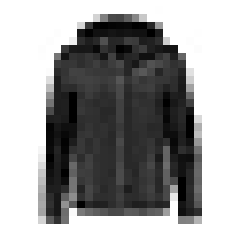

In [10]:
plt.imshow(X_train[0], cmap = "binary")
plt.axis('off')
plt.show()

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [12]:
class_names[y_train[0]]

'Coat'

**시퀀셜 API를 사용하여 모델 만들기**  

In [13]:
# 두 개의 은닉층으로 이루어진 분류용 다층 퍼셉트론
# 방법1
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

In [14]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [15]:
# 방법 2
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(300, activation = "relu"),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.layers

In [18]:
hidden1 = model.layers[1]

In [19]:
model.get_layer('dense') is hidden1

True

In [20]:
weights, biases = hidden1.get_weights()

In [21]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [22]:
print(weights.shape)
print(biases)
print(biases.shape)

(784, 300)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(300,)


**모델 컴파일**

In [23]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"])

**모델 훈련과 평가**

In [24]:
history = model.fit(X_train, y_train, epochs = 30,
                    validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 4ms/step - loss: 0.7237 - accuracy: 0.7643 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4842 - accuracy: 0.8317 - val_loss: 0.4351 - val_accuracy: 0.8538
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4392 - accuracy: 0.8457 - val_loss: 0.5327 - val_accuracy: 0.7992
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4124 - accuracy: 0.8565 - val_loss: 0.3917 - val_accuracy: 0.8646
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3940 - accuracy: 0.8624 - val_loss: 0.3743 - val_accuracy: 0.8684
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3752 - accuracy: 0.8677 - val_loss: 0.3712 - val_accuracy: 0.8726
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3632 - accuracy: 0.8712 - val_loss: 0.3612 - val_accuracy

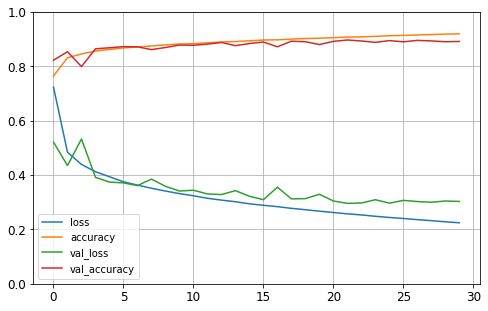

In [25]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [26]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.3369 - accuracy: 0.8826


[0.3369462788105011, 0.8826000094413757]

**모델을 사용해 예측을 만들기**

In [27]:
X_new = X_test[:3]
y_proba = model.predict(X_test)
y_proba.round(2)

array([[0.  , 0.  , 0.  , ..., 0.02, 0.  , 0.96],
       [0.  , 0.  , 0.99, ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.01, 0.  , 0.  , ..., 0.  , 0.98, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]], dtype=float32)

In [29]:
# 가장 높은 확률을 가진 클래스에만 관심이 있다면
y_pred = np.argmax(model.predict(X_new), axis = 1)
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [30]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

### 10.2.3 시퀀셜 API를 사용하여 회귀용 다층 퍼셉트론 만들기

In [31]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [33]:
model = keras.models.Sequential([
      keras.layers.Dense(30, activation = "relu", input_shape = X_train.shape[1:]),
      keras.layers.Dense(1)
])
model.compile(loss = "mean_squared_error", optimizer = "sgd")
history = model.fit(X_train, y_train, epochs = 20,
                    validation_data = (X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 4s 8ms/step - loss: 0.7987 - val_loss: 0.7527
Epoch 2/20
363/363 [==============================] - 3s 8ms/step - loss: 0.5335 - val_loss: 0.6154
Epoch 3/20
363/363 [==============================] - 3s 7ms/step - loss: 0.6129 - val_loss: 0.5031
Epoch 4/20
363/363 [==============================] - 3s 7ms/step - loss: 0.4694 - val_loss: 0.4783
Epoch 5/20
363/363 [==============================] - 3s 7ms/step - loss: 0.4462 - val_loss: 0.4613
Epoch 6/20
363/363 [==============================] - 3s 7ms/step - loss: 0.4350 - val_loss: 0.4578
Epoch 7/20
363/363 [==============================] - 3s 8ms/step - loss: 0.4263 - val_loss: 0.4457
Epoch 8/20
363/363 [==============================] - 2s 7ms/step - loss: 0.4182 - val_loss: 0.4504
Epoch 9/20
363/363 [==============================] - 3s 7ms/step - loss: 0.4116 - val_loss: 0.4361
Epoch 10/20
363/363 [==============================] - 3s 8ms/step - loss: 0.4080 - val_loss: 0.4305

### 10.2.4 함수형 API를 사용해 복잡한 모델 만들기

In [35]:
input_ = keras.layers.Input(shape = X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation = "relu")(input_)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs= [input_], outputs = [output])

In [36]:
input_A = keras.layers.Input(shape = [5], name = "wide_input")
input_B = keras.layers.Input(shape = [6], name = "deep_input")
hidden1 = keras.layers.Dense(30, activation = "relu")(input_A)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name = "output")(concat)
model = keras.Model(inputs = [input_A, input_B], outputs = [output])

In [38]:
# 모델 컴파일
model.compile(loss = "mse", optimizer = keras.optimizers.SGD(lr = 1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B= X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs = 20,
                    validation_data = ((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


363/363 [==============================] - 4s 9ms/step - loss: 1.8534 - val_loss: 0.8032
Epoch 2/20
363/363 [==============================] - 3s 7ms/step - loss: 0.7540 - val_loss: 0.7481
Epoch 3/20
363/363 [==============================] - 3s 8ms/step - loss: 0.7156 - val_loss: 0.7237
Epoch 4/20
363/363 [==============================] - 3s 8ms/step - loss: 0.6918 - val_loss: 0.7029
Epoch 5/20
363/363 [==============================] - 3s 8ms/step - loss: 0.6723 - val_loss: 0.6862
Epoch 6/20
363/363 [==============================] - 3s 8ms/step - loss: 0.6563 - val_loss: 0.6720
Epoch 7/20
363/363 [==============================] - 3s 8ms/step - loss: 0.6438 - val_loss: 0.6632
Epoch 8/20
363/363 [==============================] - 3s 8ms/step - loss: 0.6326 - val_loss: 0.6521
Epoch 9/20
363/363 [==============================] - 3s 8ms/step - loss: 0.6230 - val_loss: 0.6444
Epoch 10/20
363/363 [==============================] - 3s 8ms/step - loss: 0.6147 - val_loss: 0.6387
Epoch 11/2

규제를 위한 보조 출력 추가하기

In [39]:
input_A = keras.layers.Input(shape = [5], name = "wide_input")
input_B = keras.layers.Input(shape = [6], name = "deep_input")
hidden1 = keras.layers.Dense(30, activation = "relu")(input_A)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name = "main_output")(concat)
aux_output = keras.layers.Dense(1, name = "aux_output")(hidden2)
model = keras.Model(inputs = [input_A, input_B], outputs = [output, aux_output])

In [40]:
model.compile(loss = ["mse", "mse"], loss_weights = [0.9, 0.1], optimizer = "sgd")

In [41]:
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs = 20,
    validation_data = ([X_valid_A, X_valid_B], [y_valid, y_valid])
)

Epoch 1/20
363/363 [==============================] - 6s 12ms/step - loss: 0.9258 - main_output_loss: 0.8379 - aux_output_loss: 1.7172 - val_loss: 0.6407 - val_main_output_loss: 0.6277 - val_aux_output_loss: 0.7578
Epoch 2/20
363/363 [==============================] - 4s 10ms/step - loss: 0.5902 - main_output_loss: 0.5792 - aux_output_loss: 0.6887 - val_loss: 0.6038 - val_main_output_loss: 0.5973 - val_aux_output_loss: 0.6624
Epoch 3/20
363/363 [==============================] - 4s 10ms/step - loss: 0.5621 - main_output_loss: 0.5552 - aux_output_loss: 0.6242 - val_loss: 0.5913 - val_main_output_loss: 0.5864 - val_aux_output_loss: 0.6357
Epoch 4/20
363/363 [==============================] - 4s 11ms/step - loss: 0.5514 - main_output_loss: 0.5459 - aux_output_loss: 0.6000 - val_loss: 0.5825 - val_main_output_loss: 0.5786 - val_aux_output_loss: 0.6183
Epoch 5/20
363/363 [==============================] - 4s 12ms/step - loss: 0.5436 - main_output_loss: 0.5392 - aux_output_loss: 0.5833 - val

In [42]:
# 모델을 평가하면 개별 손실과 함께 총 손실을 반환한다.
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test]
)

162/162 [==============================] - 1s 6ms/step - loss: 0.5220 - main_output_loss: 0.5191 - aux_output_loss: 0.5480


In [43]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

### 10.2.5 서브클래싱 API로 동적 모델 만들기

In [47]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

### 10.2.6 모델 저장과 복원

In [48]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
]) 

In [49]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 4s 9ms/step - loss: 1.6711 - val_loss: 0.9434
Epoch 2/10
363/363 [==============================] - 2s 6ms/step - loss: 0.8232 - val_loss: 0.7680
Epoch 3/10
363/363 [==============================] - 2s 7ms/step - loss: 0.7207 - val_loss: 0.6953
Epoch 4/10
363/363 [==============================] - 3s 9ms/step - loss: 0.6605 - val_loss: 0.6431
Epoch 5/10
363/363 [==============================] - 3s 9ms/step - loss: 0.6153 - val_loss: 0.6020
Epoch 6/10
363/363 [==============================] - 4s 10ms/step - loss: 0.5791 - val_loss: 0.5728
Epoch 7/10
363/363 [==============================] - 3s 9ms/step - loss: 0.5499 - val_loss: 0.5485
Epoch 8/10
363/363 [==============================] - 3s 7ms/step - loss: 0.5257 - val_loss: 0.5287
Epoch 9/10
363/363 [==============================] - 2s 5ms/step - loss: 0.5062 - val_loss: 0.5134
Epoch 10/10
162/162 [==============================] - 1s 7ms/step - loss: 0.4419


In [50]:
model.save("my_keras_model.h5")

In [52]:
model = keras.models.load_model("my_keras_model.h5")

In [53]:
model.predict(X_new)

array([[0.92301965],
       [1.5977337 ],
       [3.6362894 ]], dtype=float32)

In [54]:
model.save_weights("my_keras_weights.ckpt")

In [55]:
model.load_weights("my_keras_weights.ckpt")

### 10.2.7 콜백 사용하기

In [56]:
keras.backend.clear_session()

In [57]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [59]:
model.compile(loss = "mse", optimizer = keras.optimizers.SGD(learning_rate = 1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only = "True")
history = model.fit(X_train, y_train, epochs = 10, callbacks = [checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 3s 7ms/step - loss: 0.4845
Epoch 2/10
363/363 [==============================] - 2s 7ms/step - loss: 0.4765
Epoch 3/10
363/363 [==============================] - 2s 7ms/step - loss: 0.4693
Epoch 4/10
363/363 [==============================] - 2s 6ms/step - loss: 0.4629
Epoch 5/10
363/363 [==============================] - 2s 6ms/step - loss: 0.4575
Epoch 6/10
363/363 [==============================] - 2s 6ms/step - loss: 0.4520
Epoch 7/10
363/363 [==============================] - 2s 6ms/step - loss: 0.4476
Epoch 8/10
363/363 [==============================] - 2s 7ms/step - loss: 0.4432
Epoch 9/10
363/363 [==============================] - 3s 7ms/step - loss: 0.4393
Epoch 10/10
363/363 [==============================] - 2s 7ms/step - loss: 0.4362


In [60]:
model = keras.models.load_model("my_keras_model.h5")
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 1s 5ms/step - loss: 0.4478


In [61]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 4s 9ms/step - loss: 0.4845 - val_loss: 0.4950
Epoch 2/100
363/363 [==============================] - 2s 6ms/step - loss: 0.4765 - val_loss: 0.4867
Epoch 3/100
363/363 [==============================] - 2s 4ms/step - loss: 0.4693 - val_loss: 0.4808
Epoch 4/100
363/363 [==============================] - 2s 4ms/step - loss: 0.4629 - val_loss: 0.4776
Epoch 5/100
363/363 [==============================] - 2s 4ms/step - loss: 0.4575 - val_loss: 0.4716
Epoch 6/100
363/363 [==============================] - 2s 4ms/step - loss: 0.4520 - val_loss: 0.4700
Epoch 7/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4476 - val_loss: 0.4661
Epoch 8/100
363/363 [==============================] - 2s 4ms/step - loss: 0.4432 - val_loss: 0.4624
Epoch 9/100
363/363 [==============================] - 2s 4ms/step - loss: 0.4393 - val_loss: 0.4589
Epoch 10/100
363/363 [==============================] - 2s 4ms/step - loss: 0.4362 - val_lo

In [62]:
# 사용자 정의 콜백
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))